In [1]:
import pandas as pd
import os
import numpy   as np
import matplotlib.pyplot as plt
import glob
import json
import sys
from sklearn.preprocessing import StandardScaler

In [2]:
sys.path.append(os.path.join(os.path.dirname(os.path.dirname(os.getcwd()))))
from algorithms.mssa import mssa
from algorithms.mssa_dist import mssa_dist
from evaluation.classification import compute_f1_score
import algorithms.utils as utils


In [112]:
data_name = "occupancy"
dataset = "occupancy"
data_path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "Data")
data = pd.read_csv(os.path.join(data_path,  dataset,"{}_ts.csv".format(data_name)), header=None)
labels = pd.read_csv(os.path.join(data_path, dataset,"{}_labels.csv".format(data_name)), header=None).iloc[:,:]
labels_array = np.array(labels[0])
ts = data.values[:, 1:]


In [113]:
best_param = {"window_size": 300, 
              "training_ratio": 0.5, 
              "skip": False, 
              "singular_threshold": 90000000, 
              "rows": 15, 
              "rank": None, 
              "distance_threshold": 10}

# ts = ts.reshape(-3,1)
model = mssa(**best_param)
model.detect(ts)
score = compute_f1_score(labels, model.cp, 10)
print('score: ', score)


0.20388740597033136
Distance detection
29.716026442735565
Distance detection
6.681249716262619
Distance detection
0.8611784557683344
Distance detection
0.14126003951230764
Distance detection
0.18759247013445063
Distance detection
0.22932234290086134
Distance detection
0.855378440381747
Distance detection
0.17927134682946935
Distance detection
0.20159965931463106
Distance detection
0.24491901361770257
Distance detection
7.664102387147197
Distance detection
20.82797040428035
Distance detection
27.695799440715952
Distance detection
score:  0.42857142857142855


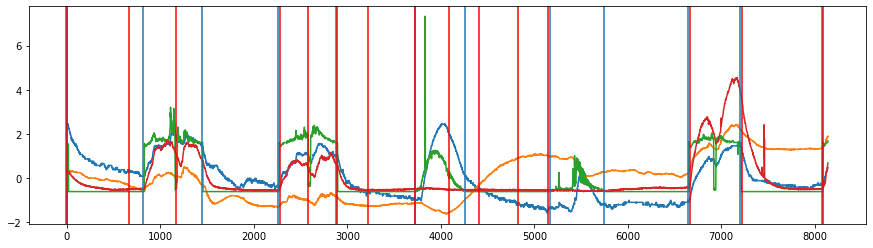

In [114]:
%matplotlib inline
fig = plt.figure(figsize=(15,4))
plt.plot(model.ts)
for cp in labels_array: 
    plt.axvline(cp-16)
for cp in np.array(model.cp)[:, 0]: 
    plt.axvline(cp, color="r")

In [41]:
labels

,0,1
0,0,847
1,848,2287
2,2288,3807
3,3808,6671
4,6672,8142


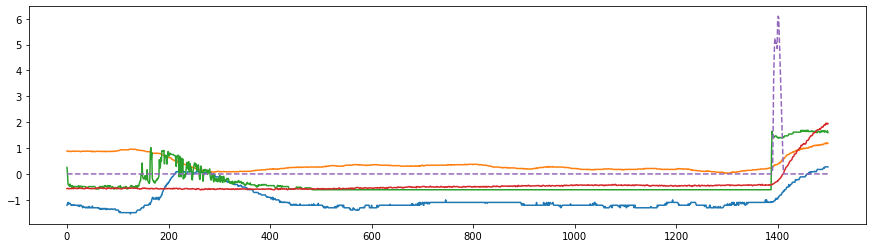

In [68]:
start = 5250
end = 5250+300 + 1200
fig = plt.figure(figsize=(15,4))
plt.plot(model.ts[start:end, :])
plt.plot(model.distance_cusum_score[start:end], "--")
# plt.axhline(46.96196973547197)

In [75]:
data_name = "beedance-6"
dataset = "beedance"
data_path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "Data")
data = pd.read_csv(os.path.join(data_path,  dataset,"{}_ts.csv".format(data_name)), header=None)
labels = pd.read_csv(os.path.join(data_path, dataset,"{}_labels.csv".format(data_name)), header=None).iloc[:,:]
labels_array = np.array(labels[0])
ts = data.values[:, 1:]


In [98]:
best_param = {"window_size": 12, 
              "training_ratio": 0.5, 
              "skip": False, 
              "singular_threshold": 900000, 
              "rows": 4, 
              "rank": None, 
              "distance_threshold": 10}

# ts = ts.reshape(-3,1)
model = mssa(**best_param)
model.detect(ts)
score = compute_f1_score(labels, model.cp, 10)
print('score: ', score)


3.6673645625147078
Distance detection
6.118681229353889
Distance detection
4.6521031401518655
Singular values detection
0.9014983885473962
Distance detection
0.3915809579223555
Distance detection
61.18571263160297
Singular values detection
9.864465559472391
Singular values detection
0.6386381671599548
Distance detection
4.1206967460735875
Singular values detection
1e-09
Singular values detection
7.69717285658407
Distance detection
1e-09
Singular values detection
5.227056759043233
Singular values detection
4.056046274704369
Distance detection
1e-09
Singular values detection
1.3259053551468194
Distance detection
1.5588312414190808
Distance detection
18.490296194704968
Singular values detection
81.32537615970165
Singular values detection
1.4451839187373048
Distance detection
1.5538033752238594
Distance detection
1e-09
score:  0.631578947368421


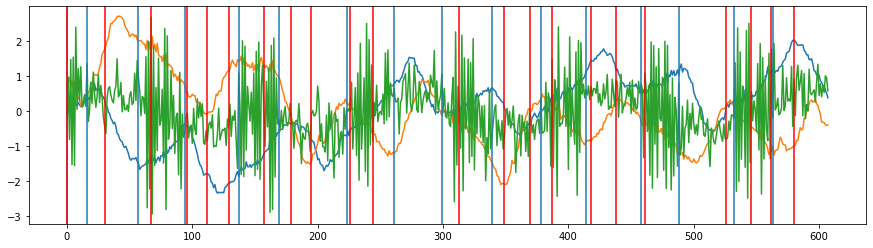

In [102]:
%matplotlib inline
fig = plt.figure(figsize=(15,4))
plt.plot(model.ts)
for cp in labels_array: 
    plt.axvline(cp)
for cp in np.array(model.cp)[:, 0]: 
    plt.axvline(cp, color="r")

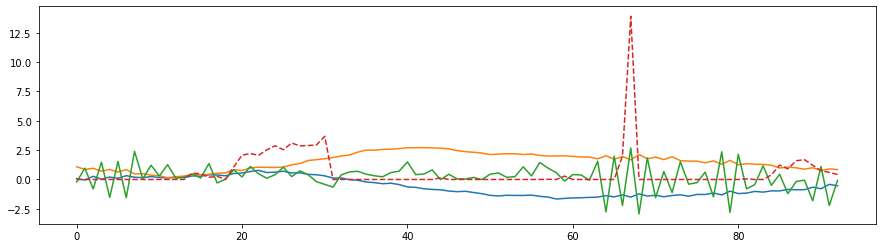

In [107]:
start = 0
end = 93
fig = plt.figure(figsize=(15,4))
plt.plot(model.ts[start:end, :])
plt.plot(model.distance_cusum_score[start:end], "--")
# plt.axhline(46.96196973547197)

In [89]:
model.cp

[[0, 32],
 [33, 64],
 [65, 105],
 [106, 137],
 [138, 179],
 [180, 208],
 [209, 237],
 [238, 268],
 [269, 294],
 [295, 322],
 [323, 388],
 [389, 430],
 [431, 461],
 [462, 504],
 [505, 534],
 [535, 585],
 [586, 607]]

In [115]:
labels[0]-labels[1]

0     -15
1    -815
2    -623
3    -815
4    -623
5    -847
6    -527
7    -911
8    -575
9    -895
10   -559
11   -879
12    -46
dtype: int64

In [116]:
labels

,0,1
0,0,15
1,16,831
2,832,1455
3,1456,2271
4,2272,2895
5,2896,3743
6,3744,4271
7,4272,5183
8,5184,5759
9,5760,6655


## Multi synth

In [3]:
data_name = "multi1"
dataset = "multi"
data_path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "Data")
data = pd.read_csv(os.path.join(data_path,  dataset,"{}_ts.csv".format(data_name)), header=None)
labels = pd.read_csv(os.path.join(data_path, dataset,"{}_labels.csv".format(data_name)), header=None).iloc[:,:]
labels_array = np.array(labels[0])
ts = data.values[:, 1:]


In [6]:
best_param = {"window_size": 200, 
              "training_ratio": 0.6, 
              "skip": False, 
              "singular_threshold": 800, 
              "rows": 10, 
              "rank": None, 
              "distance_threshold": 50}

# ts = ts.reshape(-3,1)
model = mssa(**best_param)
model.detect(ts)
score = compute_f1_score(labels, model.cp, 10)
print('score: ', score)


Rank =  9
var =  0.0056360596363830085
C =  17.902521286645744
Threshold =  14322.017029316596
Distance detection
Rank =  9
var =  0.00582536200944703
C =  18.92458319769264
Threshold =  15139.666558154113
score:  0.28571428571428575


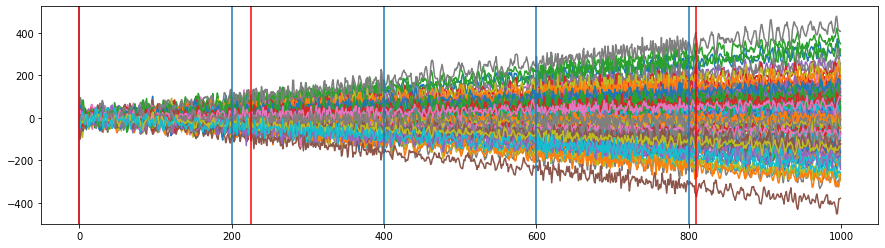

In [6]:
%matplotlib inline
fig = plt.figure(figsize=(15,4))
plt.plot(model.ts[:,:])
for cp in labels_array: 
    plt.axvline(cp)
for cp in np.array(model.cp)[:, 0]: 
    plt.axvline(cp, color="r")

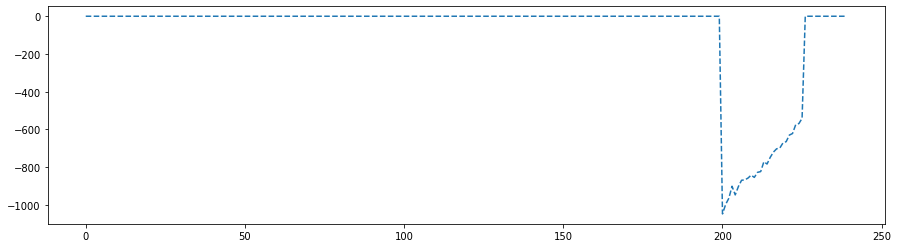

In [7]:
start = 0
end = 240
fig = plt.figure(figsize=(15,4))
# plt.plot(model.ts[start:end, :])
plt.plot(model.singular_score[start:end], "--")
# plt.axhline(46.96196973547197)

In [5]:
t = 0
r = 10
matrix = model.ts[t:t+model.window_size,:].reshape([model.rows, model.cols], order = 'F')
matrix = matrix[:,np.arange(model.cols).reshape([model.no_ts,model.cols_ts]).flatten('F')]
matrix.shape


(10, 1200)